# Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

In [5]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Allow Cell Multi Printing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

## Get historical data for the instruments

In [6]:
x = pd.read_csv('EWA.csv',index_col=0)['Close']
y = pd.read_csv('EWC.csv',index_col=0)['Close']    

df = pd.concat([y,x],axis=1)
df.columns = ['EWC','EWA']
df.index = pd.to_datetime(df.index, yearfirst=True)

## Find hedge ratio

In [14]:
import statsmodels.api as sm
# OLS(Y,X)

nDays = 45
model = sm.OLS(df.EWC.iloc[:nDays], df.EWA.iloc[:nDays])
model = model.fit() 
'The hedge ratio is %.2f' % model.params[0]

'The hedge ratio is 1.48'

<Figure size 1000x700 with 0 Axes>

[]

Text(0.5, 0, 'EWA')

Text(0, 0.5, 'EWC')

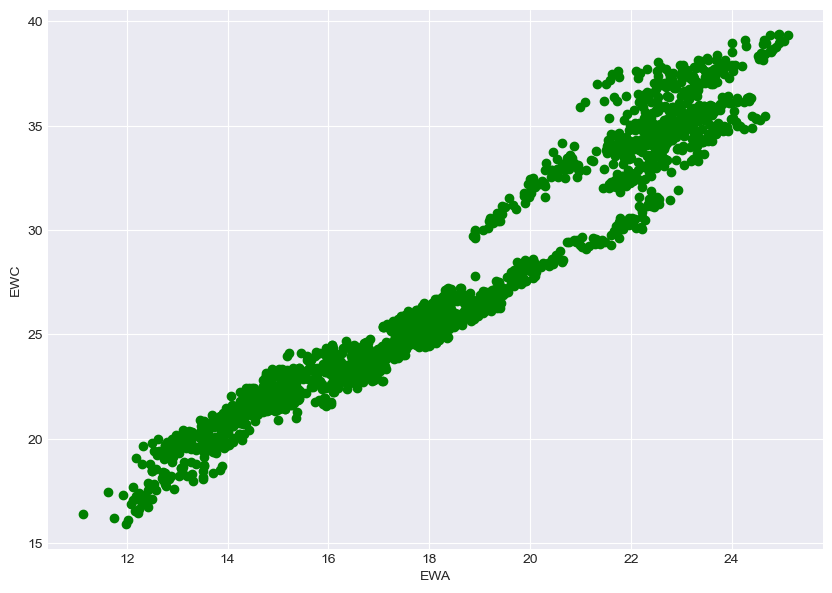

In [15]:
plt.figure(figsize=(10,7))
# scatter(X,Y)
plt.scatter(df.EWA,df.EWC, color='green')
plt.plot()
plt.xlabel('EWA')
plt.ylabel('EWC')
plt.show()

## Form the spread

<Axes: xlabel='Date'>

Text(0, 0.5, 'Spread')

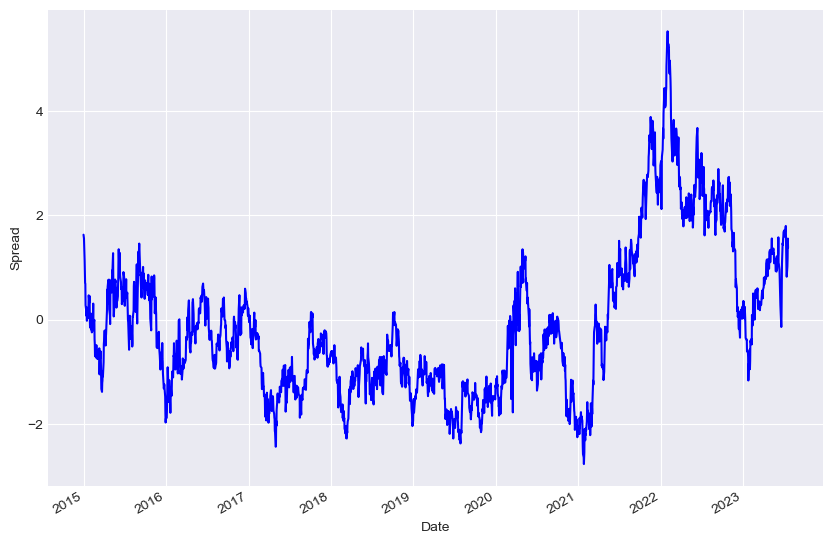

In [16]:
df['spread'] = df.EWC - model.params[0] * df.EWA
# Plot the spread
df.spread.plot(figsize=(10,7), color='blue')
plt.ylabel("Spread")
plt.show()

In [17]:
# To perform ADF Test
from statsmodels.tsa.stattools import adfuller
# Compute ADF test statistics
adf = adfuller(df.spread, maxlag = 1)
round(adf[0],2)

-2.97

In [18]:
adf[4]

{'1%': -3.433395174244582,
 '5%': -2.8628852455647933,
 '10%': -2.567486142563548}

## ADF Test
The null hypothesis is that the series is NOT stationary. Therefore if p-value < 0.05 we reject H0 and say the series is stationary o.w. the series is considered non-stationary.

In [20]:
print("ADF test results:")
print(f"Test statistic: {adf[0]:.2f}")
print(f"P-value: {adf[1]:.2f}")
print(f"Number of lags used: {adf[2]:.2f}")
print(f"Critical values: {adf[4]}")

ADF test results:
Test statistic: -2.97
P-value: 0.04
Number of lags used: 1.00
Critical values: {'1%': -3.433395174244582, '5%': -2.8628852455647933, '10%': -2.567486142563548}
